In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import imblearn
from imblearn.over_sampling import  SMOTE
import math
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
class1 = df[df['Class']==1]

In [18]:
class1.shape

(492, 31)

In [10]:
temp = shuffle(class1)

In [17]:
temp.shape

(492, 31)

In [15]:
d1 = temp.iloc[:2000,:]

In [16]:
d1.shape

(492, 31)

In [19]:
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]

In [23]:
X.shape,Y.shape

((284807, 30), (284807,))

In [24]:
# imbalance data handling
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [25]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
data=pd.concat([X,Y],axis=1)
d=data.values
data=pd.DataFrame(d,columns=names)

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [27]:
data['Class'].value_counts()

0.0    284315
1.0    284315
Name: Class, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

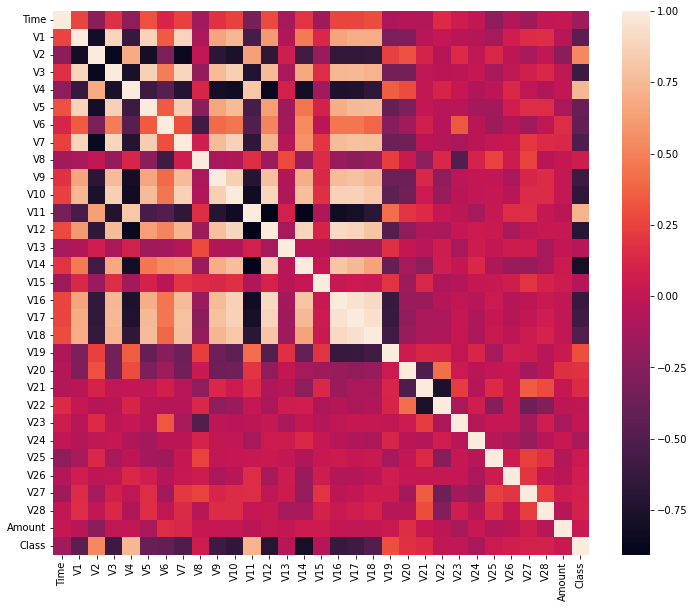

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())



In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)


In [34]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
437378,74924.702104,-0.686004,1.179490,0.139938,0.285198,0.132141,-1.276809,0.902331,-0.196019,-0.399156,...,-0.167430,0.021960,-0.243938,-0.100177,0.253494,0.211248,-0.591910,-0.122543,0.040445,69.630104
504222,31104.285700,-2.401942,1.001631,0.807594,2.992284,0.127352,0.114616,1.221635,-2.037524,-0.219640,...,-0.840547,0.507469,0.201744,0.161209,0.563617,-0.403885,-0.086541,-2.104769,0.310993,90.392299
4794,4267.000000,-0.851994,0.935553,2.188136,0.709286,0.178930,-0.349335,0.857609,-0.416252,1.066375,...,0.270933,-0.411022,-0.404762,-0.096893,0.404476,0.377388,0.344173,-0.000311,-0.125090,30.530000
388411,84308.265538,-1.774152,2.995084,-6.173329,4.562258,-2.406689,-2.249984,-5.855187,1.569424,-4.086540,...,1.031177,1.109673,-0.398387,-0.117935,-0.355338,0.808269,0.976564,1.388705,0.547354,2.619406
424512,20782.556198,-16.181737,9.067796,-23.111024,11.852218,-9.333424,-2.430265,-16.801735,1.235770,-6.295744,...,0.996602,-2.344929,1.015300,1.173158,-1.046142,-0.060228,0.662262,2.126157,-1.414554,1.000000


In [35]:
y_test.head()

437378    1.0
504222    1.0
4794      0.0
388411    1.0
424512    1.0
Name: Class, dtype: float64

In [36]:
cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

scaler = StandardScaler()

frames= ['Time', 'Amount']

x= data[frames]

d_temp = data.drop(frames, axis=1)

temp_col=scaler.fit_transform(x)

scaled_col = pd.DataFrame(temp_col, columns=frames)



d_scaled = pd.concat([scaled_col, d_temp], axis =1)






In [38]:
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.823447,0.243584,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-1.823447,-0.422082,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.823426,1.281250,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-1.823426,0.125247,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.823406,-0.117180,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


dimension reduction by the PCA

In [39]:
pca = PCA(n_components=7)

In [40]:
X_temp_reduced = pca.fit_transform(d_scaled)

In [41]:
pca.explained_variance_ratio_


array([0.67949336, 0.09761896, 0.07988657, 0.03341988, 0.0324338 ,
       0.01054341, 0.00790268])

In [42]:
pca.explained_variance_


array([209.24029861,  30.06036681,  24.59993048,  10.29117584,
         9.98752516,   3.24669364,   2.43351821])

In [43]:
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']


In [44]:
X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank
0,-9.753015,0.549105,1.181061,-0.651147,1.633708,0.894678,-1.008740
1,-9.767029,0.372815,1.109112,-0.031308,0.564446,-1.106611,-0.384842
2,-9.849717,0.461754,1.170640,-0.644928,1.732178,1.574545,0.772342
3,-9.905016,0.574634,1.498383,-0.599941,1.711357,0.223375,-0.674150
4,-9.710662,0.787151,1.488529,-1.048059,1.290100,-0.032450,-0.916231


In [45]:
Y=d_scaled['Class']
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,-9.753015,0.549105,1.181061,-0.651147,1.633708,0.894678,-1.008740,0.0
1,-9.767029,0.372815,1.109112,-0.031308,0.564446,-1.106611,-0.384842,0.0
2,-9.849717,0.461754,1.170640,-0.644928,1.732178,1.574545,0.772342,0.0
3,-9.905016,0.574634,1.498383,-0.599941,1.711357,0.223375,-0.674150,0.0
4,-9.710662,0.787151,1.488529,-1.048059,1.290100,-0.032450,-0.916231,0.0


In [46]:
new_data.to_csv('finaldata.csv')

In [2]:
df = pd.read_csv('data/finaldata.csv')
df.head()

,Unnamed: 0,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,0,-9.753015,0.549105,1.181061,-0.651147,1.633708,0.894678,-1.008740,0.0
1,1,-9.767029,0.372815,1.109112,-0.031308,0.564446,-1.106611,-0.384842,0.0
2,2,-9.849717,0.461754,1.170640,-0.644928,1.732178,1.574545,0.772342,0.0
3,3,-9.905016,0.574634,1.498383,-0.599941,1.711357,0.223375,-0.674150,0.0
4,4,-9.710662,0.787151,1.488529,-1.048059,1.290100,-0.032450,-0.916231,0.0


In [4]:
df = df.iloc[:,1:]

In [6]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size = 0.30, random_state = 42)


In [48]:
X_train.shape, X_test.shape


((398041, 7), (170589, 7))

In [8]:
svc_param2=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param2.fit(X_train,y_train)

SVC(C=100, gamma=0.01)

In [9]:
import pickle
# Saving model to disk
pickle.dump(svc_param2, open('model2.pkl','wb'))

In [10]:
y_pred = svc_param2.predict(X_test)

In [11]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     85149
         1.0       0.99      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



In [51]:
pickle.dump(X_test,open('data/x_test.pkl','wb'))

In [57]:
X_test.values[0]


array([-8.1673991 ,  0.18796725,  0.611873  ,  0.01167418, -0.02769017,
       -0.24487638, -0.56675784])

In [58]:
new_data.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,-9.753015,0.549105,1.181061,-0.651147,1.633708,0.894678,-1.008740,0.0
1,-9.767029,0.372815,1.109112,-0.031308,0.564446,-1.106611,-0.384842,0.0
2,-9.849717,0.461754,1.170640,-0.644928,1.732178,1.574545,0.772342,0.0
3,-9.905016,0.574634,1.498383,-0.599941,1.711357,0.223375,-0.674150,0.0
4,-9.710662,0.787151,1.488529,-1.048059,1.290100,-0.032450,-0.916231,0.0


In [54]:
X_test.values[5]


array([-9.57135113,  0.86383995,  1.46720172, -0.43663537,  1.1212021 ,
        1.39932438, -1.49645872])

In [56]:
X_test.values[6:11]


array([[-7.7993604 , -0.1899133 ,  0.16442362,  1.20345244, -2.47992282,
        -0.22174801,  1.85918979],
       [-0.5863174 , -2.20647021, -2.11709288, -0.57504016,  2.03002489,
        -0.63729821, -0.66066583],
       [-9.30997361,  0.86471565,  2.33575711, -0.63411576,  1.30331634,
         0.12688249, -1.54784835],
       [ 2.19906078, -1.41661556,  1.67953467, -1.1405215 ,  2.18095262,
         4.06348294,  4.99759886],
       [-9.84895658,  0.45273415,  0.99368719, -0.43995317,  1.7122407 ,
         1.616107  , -0.37495162]])